In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-07-08 17:02:37.885580: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 17:02:37.920627: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 17:02:38.061269: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 17:02:38.062243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 17:02:38.926030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# Cargar el archivo CSV
df = pd.read_csv("dataset_randomized.csv")
classes = ["banana", "naranja", "sandia"]
# Dividir los datos en características (X) y etiquetas (y)
images = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [3]:
# Convertir las características a formato adecuado para TensorFlow (float32)
images_train = images_train.astype(np.float32)
images_test = images_test.astype(np.float32)

# Normalizar las características entre 0 y 1
images_train /= 255.0
images_test /= 255.0

# Reorganizar las características para que tengan la forma adecuada para CNN (28x28x3)
images_train = images_train.reshape(-1, 28, 28, 3)
images_test = images_test.reshape(-1, 28, 28, 3)

# Convertir las etiquetas a formato adecuado para TensorFlow (entero)
labels_train = labels_train.astype(np.int32)
labels_test = labels_test.astype(np.int32)


In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=len(classes), activation='softmax')
])


In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(images_train, labels_train, epochs=3, batch_size=32, validation_data=(images_test, labels_test))


Epoch 1/3
7/7 [==============================] - 0s 20ms/step - loss: 0.9411 - accuracy: 0.5278 - val_loss: 0.5304 - val_accuracy: 0.8519
Epoch 2/3
7/7 [==============================] - 0s 8ms/step - loss: 0.4595 - accuracy: 0.8611 - val_loss: 0.2995 - val_accuracy: 0.9259
Epoch 3/3
7/7 [==============================] - 0s 9ms/step - loss: 0.2156 - accuracy: 0.9491 - val_loss: 0.1928 - val_accuracy: 0.9630


In [86]:
test_loss, test_accuracy = model.evaluate(images_test, labels_test, verbose=2)
print("Precisión en el conjunto de prueba:", test_accuracy)

2/2 - 0s - loss: 0.1928 - accuracy: 0.9630 - 14ms/epoch - 7ms/step
Precisión en el conjunto de prueba: 0.9629629850387573


2/2 - 0s - loss: 0.1928 - accuracy: 0.9630 - 14ms/epoch - 7ms/step


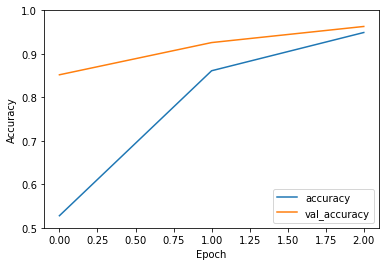

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test,  labels_test, verbose=2)

In [88]:
def mostrar_imagen_clasificada(imagen, modelo, clases):
    # Preprocesa la imagen
    imagen_preprocesada = imagen.astype(np.float32) / 255.0
    imagen_preprocesada = np.expand_dims(imagen_preprocesada, axis=0)

    # Realiza la clasificación con el modelo
    prediccion = modelo.predict(imagen_preprocesada)
    clase_predicha = np.argmax(prediccion[0])
    etiqueta_predicha = clases[clase_predicha]

    # Muestra la imagen y la clasificación
    plt.imshow(imagen)
    plt.axis('off')
    plt.title('Clase predicha: {}'.format(etiqueta_predicha))
    plt.show()


## Hacer predicciones

In [89]:
predictions = model.predict(images_test)

2/2 [==============================] - 0s 3ms/step


In [90]:
predictions[5]

array([0.9679469 , 0.00104542, 0.03100774], dtype=float32)

In [91]:
pred_label = np.argmax(predictions[1])
print(pred_label, " [", classes[pred_label], "]", sep="")

0 [banana]


In [92]:
labels_test[0]

1

In [93]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

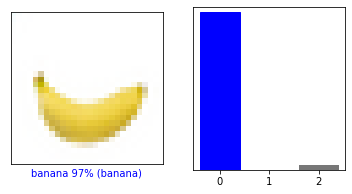

In [94]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()

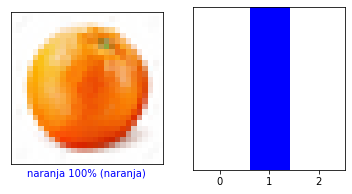

In [95]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()

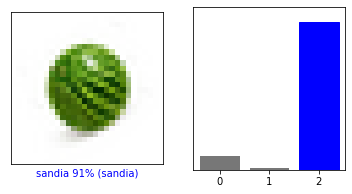

In [96]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()

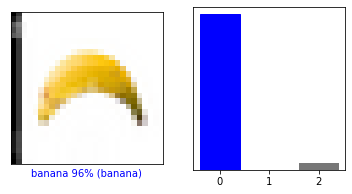

In [97]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test, images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_test)
plt.show()